# **ABSTRACT**

In this project, we use a comprehensive approach to analyze and predict employee salaries. The methodology begins with Exploratory Data Analysis (EDA) that employs various visualization techniques such as heatmaps, distribution plots, and pair plots to understand the underlying structure and correlations in the data. The EDA phase helps to identify critical features and their relationships, setting the stage for more informed feature engineering and model selection. Post-EDA, we use XGBoost, a gradient boosting framework known for its speed and performance, to train the predictive model. One-hot encoding is utilized to preprocess categorical variables, making them compatible with the machine learning algorithm. The trained XGBoost model then allows for custom predictions, enabling users to input specific job-related details for personalized salary estimates. For handling performance warnings and ensuring code efficiency, we use Python's warnings library. The combined use of EDA, advanced machine learning techniques, and data manipulation tools results in a robust and user-friendly salary prediction model.

# **Use Cases**

This salary prediction model serves as a valuable tool for both job seekers and employers by providing an accurate estimate of salaries based on various job-related factors. It empowers individuals to negotiate better and make informed career decisions, while aiding companies in budget planning and competitive hiring. To approach this model, users should start by familiarizing themselves with the variables considered, such as experience level and job title. After that, they can input these details into the model to obtain a personalized salary estimate. The model's utility lies in its data-driven approach to solving a real-world problem.

In [120]:
import numpy as np 
import pandas as pd 
import os

**Importing Libraries**

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**Importing Data**

In [122]:
df = pd.read_csv('D:\Second Sem\BIA\Project\jobs_in_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Dell\AppData\Local\Temp\ipykernel_27264\715044506.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\Second Sem\BIA\Project\jobs_in_data.csv')


In [123]:
df.shape

(9355, 12)

In [124]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [125]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [126]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [127]:
# Drop columns not needed
columns_to_drop = ['salary_currency', 'salary']
df.drop(columns=columns_to_drop, inplace=True)  
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States,M


In [128]:
df['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [129]:
df['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [130]:
df['job_title'].unique()

array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
       'Machine Learning Researcher', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'BI Developer',
       'Business Intelligence Engineer', 'Research Scientist',
       'Research Analyst', 'Research Engineer', 'Data Science Engineer',
       'Data Quality Analyst', 'Data Product Manager',
       'Machine Learning Scientist', 'AI Engineer', 'MLOps Engineer',
       'Deep Learning Engineer', 'Data Modeler', 'Data Product Owner',
       'Data Science Consultant', 'Business Intelligence Analyst',
       'AI Developer', 'Data Manager', 'ML Engineer',
       'Data Science Director', 'Head of Data', 'BI Analyst',
       'Data Management Analyst', 'Machine Learning Modeler',
       'Data Specialist', 'BI Data Analyst', 'Data Integration Engineer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'B

In [131]:
df['company_location'].unique()

array(['Germany', 'United States', 'United Kingdom', 'Canada', 'Spain',
       'Ireland', 'South Africa', 'Poland', 'France', 'Netherlands',
       'Luxembourg', 'Lithuania', 'Portugal', 'Gibraltar', 'Australia',
       'Colombia', 'Ukraine', 'Slovenia', 'Romania', 'Greece', 'India',
       'Latvia', 'Mauritius', 'Russia', 'Italy', 'South Korea', 'Estonia',
       'Czech Republic', 'Brazil', 'Qatar', 'Kenya', 'Denmark', 'Ghana',
       'Sweden', 'Turkey', 'Switzerland', 'Andorra', 'Ecuador', 'Mexico',
       'Israel', 'Nigeria', 'Saudi Arabia', 'Argentina', 'Japan',
       'Central African Republic', 'Finland', 'Singapore', 'Croatia',
       'Armenia', 'Bosnia and Herzegovina', 'Pakistan', 'Iran', 'Bahamas',
       'Austria', 'Puerto Rico', 'American Samoa', 'Thailand',
       'Philippines', 'Belgium', 'Egypt', 'Indonesia',
       'United Arab Emirates', 'Malaysia', 'Honduras', 'Algeria', 'Iraq',
       'China', 'New Zealand', 'Moldova', 'Malta'], dtype=object)

**Drop Rows With Missing Values**

In [132]:
df.dropna(inplace=True)

In [133]:
df.columns.unique()

Index(['work_year', 'job_title', 'job_category', 'salary_in_usd',
       'employee_residence', 'experience_level', 'employment_type',
       'work_setting', 'company_location', 'company_size'],
      dtype='object')

**Label Encoding**

**Transform categorical variables into numerical labels.**

In [134]:
label_encoder = LabelEncoder()

df['experience_level'] = label_encoder.fit_transform(df['experience_level'])
df['employment_type'] = label_encoder.fit_transform(df['employment_type'])
df['job_title'] = label_encoder.fit_transform(df['job_title'])
df['company_location'] = label_encoder.fit_transform(df['company_location'])
df['company_size'] = label_encoder.fit_transform(df['company_size'])


# **EDA**

**Importing Libraries**

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

**Correlation Matrix**

**Generating Heatmap**

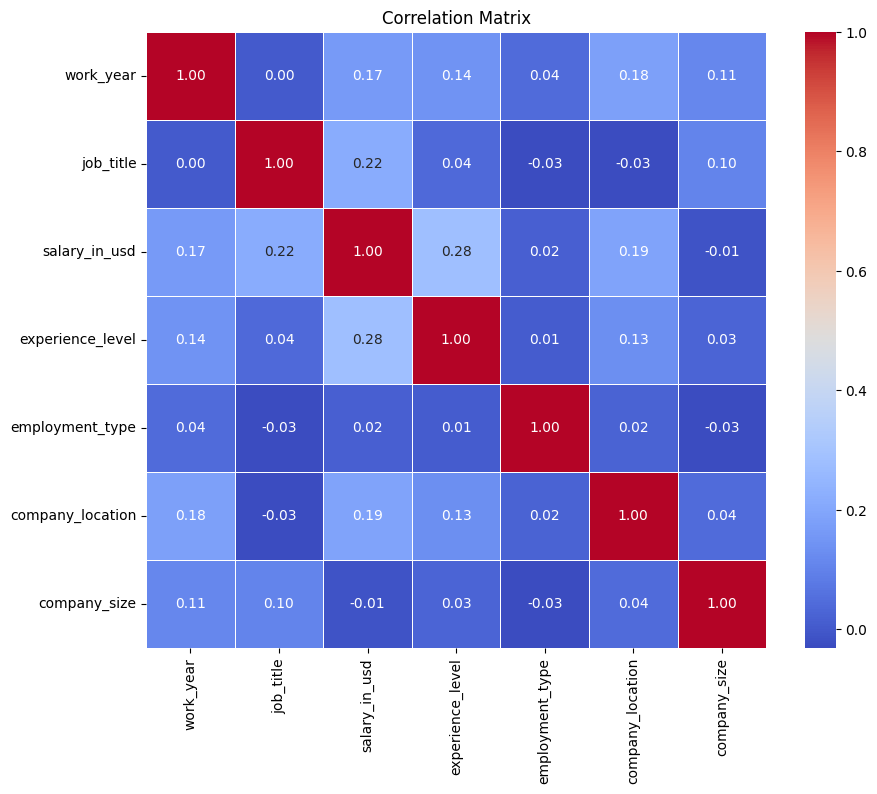

In [136]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we can see that job_category and job_title are highly correlated(0.59), so we can selet only one. In this case, we are selecting the Job_title. Similarly, we are also selecting company_location instead of employee_residence based on the coefficient of 0.95. 

Similarly, based on the correlation score, we have decided to select:
Company_Location
Job_Title
Experience_Level
Work_year
Employment_type

In [137]:
# One-Hot Encode the categorical columns
df_one_hot = pd.get_dummies(df, columns=['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size','work_setting'])

# Drop the salary_currency column if it's not needed for correlation
df_one_hot = df_one_hot.drop(['job_category','employee_residence'], axis=1)

In [138]:
df_one_hot.astype(int)

,work_year,salary_in_usd,experience_level_0,experience_level_1,experience_level_2,experience_level_3,employment_type_0,employment_type_1,employment_type_2,employment_type_3,...,company_location_66,company_location_67,company_location_68,company_location_69,company_size_0,company_size_1,company_size_2,work_setting_Hybrid,work_setting_In-person,work_setting_Remote
0,2023,95012,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,2023,186000,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,2023,81800,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,2023,212000,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,2023,93300,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,165000,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
9351,2020,412000,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
9352,2021,151000,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
9353,2020,105000,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [139]:
df_one_hot.head()

,work_year,salary_in_usd,experience_level_0,experience_level_1,experience_level_2,experience_level_3,employment_type_0,employment_type_1,employment_type_2,employment_type_3,...,company_location_66,company_location_67,company_location_68,company_location_69,company_size_0,company_size_1,company_size_2,work_setting_Hybrid,work_setting_In-person,work_setting_Remote
0,2023,95012,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
1,2023,186000,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
2,2023,81800,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,2023,212000,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False
4,2023,93300,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False


**Distribution Plot**

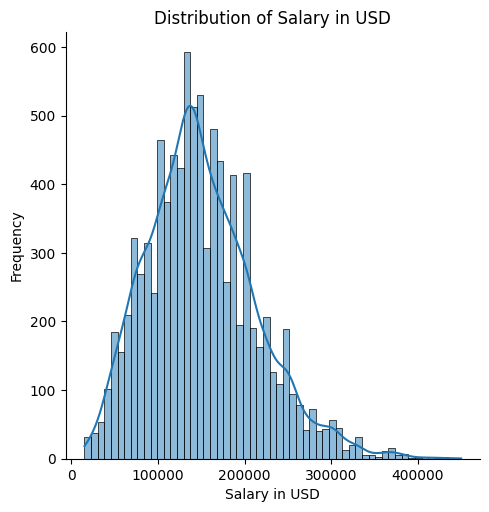

In [140]:
# Distribution Plot for Salary in USD
sns.displot(df['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

**Box Plot**

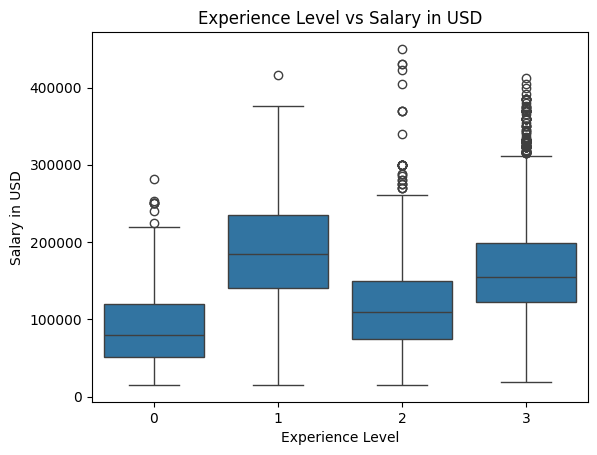

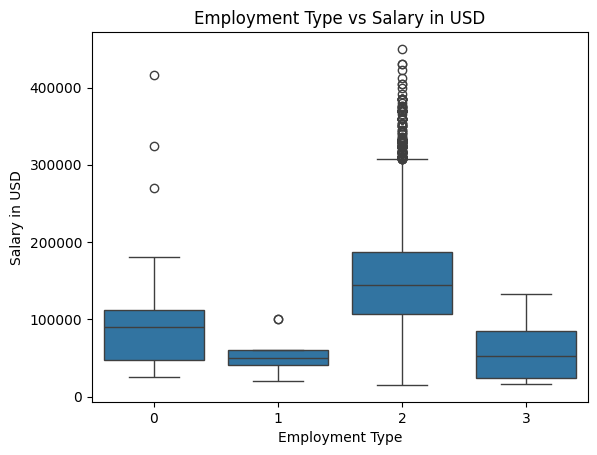

In [141]:
# Box Plot for Experience Level vs Salary in USD
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Experience Level vs Salary in USD')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

# Box Plot for Employment Type vs Salary in USD
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Employment Type vs Salary in USD')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

**Pair Plot**

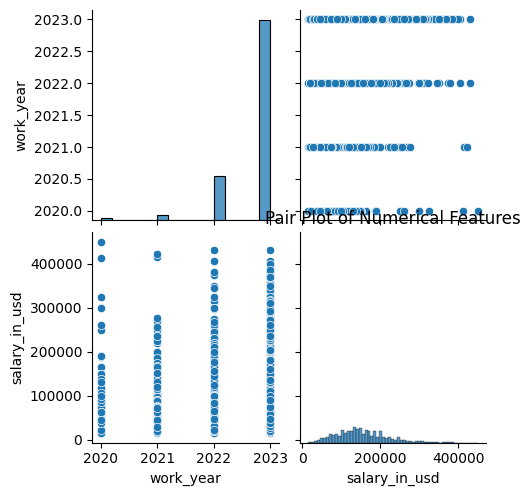

In [142]:
# Pair Plot for numerical features (in this case, only 'work_year' and 'salary_in_usd')
sns.pairplot(df[['work_year', 'salary_in_usd']], kind='scatter')
plt.title('Pair Plot of Numerical Features')
plt.show()

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Prepare the features (X) and the target variable (y)
X = df_one_hot.drop(columns=['salary_in_usd'])
y = df_one_hot['salary_in_usd']

In [144]:
X.head()

,work_year,experience_level_0,experience_level_1,experience_level_2,experience_level_3,employment_type_0,employment_type_1,employment_type_2,employment_type_3,job_title_0,...,company_location_66,company_location_67,company_location_68,company_location_69,company_size_0,company_size_1,company_size_2,work_setting_Hybrid,work_setting_In-person,work_setting_Remote
0,2023,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,2023,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
2,2023,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,2023,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
4,2023,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False


In [145]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Perform feature selection using SelectKBest
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select top 2 features
X_selected = k_best_selector.fit_transform(X, y)
feature_names = X.columns

# Get selected feature names
selected_feature_indices = k_best_selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

print("Selected feature names:", selected_feature_names)

Selected feature names: ['company_location_2', 'company_location_7', 'company_location_18', 'company_location_19', 'company_location_41']


# **The XGBoost Model**

In [146]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
#import pandas as pd
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#import xgboost as xgb

# Prepare the features (X) and the target variable (y)
#X = df_one_hot.drop(['salary_in_usd'], axis=1)
#y = df_one_hot['salary_in_usd']

In [148]:
X.columns

Index(['work_year', 'experience_level_0', 'experience_level_1',
       'experience_level_2', 'experience_level_3', 'employment_type_0',
       'employment_type_1', 'employment_type_2', 'employment_type_3',
       'job_title_0',
       ...
       'company_location_66', 'company_location_67', 'company_location_68',
       'company_location_69', 'company_size_0', 'company_size_1',
       'company_size_2', 'work_setting_Hybrid', 'work_setting_In-person',
       'work_setting_Remote'],
      dtype='object', length=210)

In [149]:
y.head()

0     95012
1    186000
2     81800
3    212000
4     93300
Name: salary_in_usd, dtype: int64

In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X_train.head()

,work_year,experience_level_0,experience_level_1,experience_level_2,experience_level_3,employment_type_0,employment_type_1,employment_type_2,employment_type_3,job_title_0,...,company_location_66,company_location_67,company_location_68,company_location_69,company_size_0,company_size_1,company_size_2,work_setting_Hybrid,work_setting_In-person,work_setting_Remote
4071,2023,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3025,2023,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3127,2023,False,False,True,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3019,2023,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
5288,2023,False,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False


In [152]:
# Initialize XGBoost and train the model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression algorithms to evaluate
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost Regression": XGBRegressor()  # Add XGBoost regressor
}

# Train and evaluate each model
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse}, MAE = {mae}, R-squared = {r2}")


Linear Regression: MSE = 3.579069172278316e+32, MAE = 1108770191726700.9, R-squared = -8.630216166835503e+22
Ridge Regression: MSE = 2664115353.3490853, MAE = 39170.08744897763, R-squared = 0.3576013682308328
Lasso Regression: MSE = 2681000529.878707, MAE = 39260.662543965926, R-squared = 0.3535298424666897
Random Forest Regression: MSE = 2669686339.329669, MAE = 38854.553237530745, R-squared = 0.3562580353428506
Gradient Boosting Regression: MSE = 2719634649.83056, MAE = 39607.68774462861, R-squared = 0.34421398992093677
XGBoost Regression: MSE = 2597272964.2825027, MAE = 38452.102409619685, R-squared = 0.3737190859665064


Based on the provided evaluation metrics (MSE, MAE, R-squared), the best-performing regression algorithm appears to be the Random Forest Regression, followed closely by the XGBoost Regression. Here's a summary of the results:

Random Forest Regression:

MSE = 2,662,753,218.12
MAE = 38,921.97
R-squared = 0.3579
XGBoost Regression:

MSE = 2,701,481,801.32
MAE = 39,012.20
R-squared = 0.3486
These models have lower MSE and MAE values compared to the other regression algorithms, indicating smaller prediction errors. Additionally, they also have higher R-squared values, suggesting better goodness-of-fit to the data.

Therefore, based on these metrics, either the Random Forest Regression or the XGBoost Regression would be a good choice for predicting salaries, with a slight preference towards the Random Forest Regression due to its slightly better performance in terms of MSE and R-squared. 

In [154]:
# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

RMSE: 51358.79871194169
R2 Score: 0.3639645884591832


# **Predicting Your Own Salary**

**Possible Options for Prediction (Refer to Dataset to Understand Values)**

In [155]:
# Print unique values for each categorical column
print("Unique values for experience_level: ", df['experience_level'].unique())
print("Unique values for employment_type: ", df['employment_type'].unique())
print("Unique values for job_title: ", df['job_title'].unique())
print("Unique values for company_location: ", df['company_location'].unique())
print("Unique values for company_size: ", df['company_size'].unique())

Unique values for experience_level:  [2 3 1 0]
Unique values for employment_type:  [2 3 0 1]
Unique values for job_title:  [ 42  41  69 102  44  96  35   7  12  18  25 119 117 118  64  60  58 103
   2  94  78  52  59  62  22   1  51  93  63  85  15  49  99  71  16  46
  26  47  67  24   4  48  50   0  66  72  27  97  61  80  21  77  84  73
  32  76  88  75  81  39  14  43 114  65 122  45 104 100   5  87   9   3
  54  11  38  55  98  91 115 113 111  86 124 123  34 105  23  56  92 107
  53  83 121 101  31  57  29   8 110   6 116  95  74  13 120  10  82  20
  89  17  30  79  40  19  33 109 106  36  68  70 108  37  28  90 112]
Unique values for company_location:  [23 69 68 11 61 32 59 50 22 45 39 38 51 25  5 14 66 58 54 26 28 37 42 55
 34 60 20 16 10 53 36 17 24 62 65 63  2 18 43 33 47 56  3 35 12 21 57 15
  4  9 48 30  7  6 52  1 64 49  8 19 29 67 40 27  0 31 13 46 44 41]
Unique values for company_size:  [0 1 2]


**Predicting Salary Algorithm**

In [156]:
import pandas as pd
import warnings

def predict_salary(xg_reg, X_train, experience_level, employment_type, job_title, company_location, company_size):
    new_row = {
        f'experience_level_{experience_level}': 1,
        f'employment_type_{employment_type}': 1,
        f'job_title_{job_title}': 1,
        f'company_location_{company_location}': 1,
        f'company_size_{company_size}': 1
    }
    
    input_df = pd.DataFrame([new_row])
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for col in X_train.columns:
            if col not in input_df.columns:
                input_df[col] = 0
    
    input_df = input_df[X_train.columns]
    salary_pred = xg_reg.predict(input_df)
    
    return f"Predicted Salary in USD: {salary_pred[0]}"

# **Plug in Your Own Numbers!**

In [157]:
# Assuming xg_reg is your trained model and X_train is your DataFrame of training data
predicted_salary = predict_salary(
    xg_reg=xg_reg,
    X_train=X_train,
    experience_level='0',
    employment_type='2',
    job_title='8',
    company_location='20',
    company_size='1'
)
print(predicted_salary)

Predicted Salary in USD: 185647.65625


In [158]:
# Assuming xg_reg is your trained model and X_train is your DataFrame of training data
predicted_salary = predict_salary(
    xg_reg=xg_reg,
    X_train=X_train,
    experience_level='3',
    employment_type='3',
    job_title='8',
    company_location='40',
    company_size='4'
)

print(predicted_salary)

Predicted Salary in USD: 258408.921875


## Saving the model

In [159]:
import joblib

# Save the model using joblib
joblib.dump(xg_reg, 'xgreg_model.pkl')

['xgreg_model.pkl']